In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wanliu.csv to Wanliu.csv


In [3]:
data=read_csv("Wanliu.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0


In [4]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Wanliu.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [5]:
dataset.drop("No", axis=1, inplace=True)

In [6]:
dataset=dataset.fillna(method="pad")

In [7]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [8]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000
mean,83.516054,110.658234,18.417596,65.970555,1331.700091,46.920645,13.426323,1011.102728,3.263752,0.068224,1.50130
std,82.177505,93.613123,22.743577,38.242816,1267.955273,54.452884,11.348467,10.356530,13.679802,0.896471,1.10461
min,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.00000
25%,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,0.80000
50%,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.20000
75%,116.000000,153.000000,23.000000,90.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.00000
max,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.20000


In [9]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

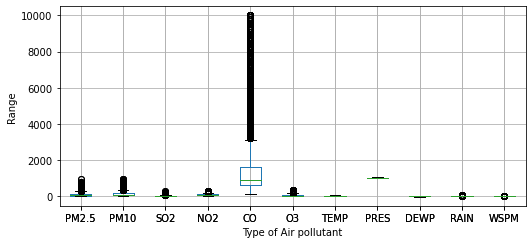

In [10]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

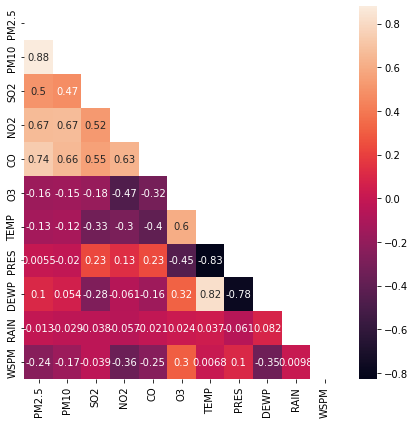

In [11]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Wanliuheat.jpg', dpi=400) 
# displaying heatmap
plt.show()

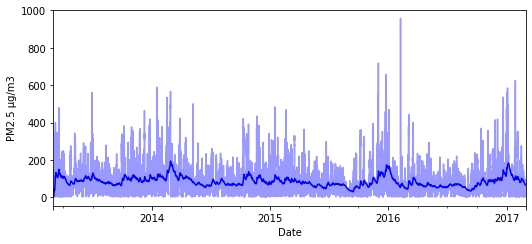

In [12]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./Wanliu.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 3., 6., ..., 3., 5., 4.], dtype=float32)

In [ ]:
values

array([[ 8. ,  8. ,  6. , ...,  0. ,  6. ,  4.4],
       [ 9. ,  9. ,  6. , ...,  0. ,  3. ,  4.7],
       [ 3. ,  6. ,  6. , ...,  0. ,  6. ,  5.6],
       ...,
       [13. , 35. ,  7. , ...,  0. ,  3. ,  1.1],
       [12. , 31. ,  5. , ...,  0. ,  5. ,  1. ],
       [ 7. , 25. ,  6. , ...,  0. ,  4. ,  1.1]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(GRU(units = 50)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath="/save.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
tb = TensorBoard('logs')
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,callbacks=[mcp,rlr],validation_data=(X_test, Y_test), verbose=1, shuffle=False)


Epoch 1/100
410/411 [============================>.] - ETA: 0s - loss: 0.0022
Epoch 1: val_loss improved from inf to 0.00173, saving model to /save.h5
411/411 [==============================] - 37s 47ms/step - loss: 0.0022 - val_loss: 0.0017 - lr: 0.0010
Epoch 2/100
411/411 [==============================] - ETA: 0s - loss: 0.0013
Epoch 2: val_loss improved from 0.00173 to 0.00128, saving model to /save.h5
411/411 [==============================] - 22s 53ms/step - loss: 0.0013 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/100
410/411 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 3: val_loss improved from 0.00128 to 0.00117, saving model to /save.h5
411/411 [==============================] - 14s 35ms/step - loss: 0.0011 - val_loss: 0.0012 - lr: 0.0010
Epoch 4/100
411/411 [==============================] - ETA: 0s - loss: 8.8633e-04
Epoch 4: val_loss improved from 0.00117 to 0.00110, saving model to /save.h5
411/411 [==============================] - 14s 33ms/step - loss: 8.8

In [ ]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

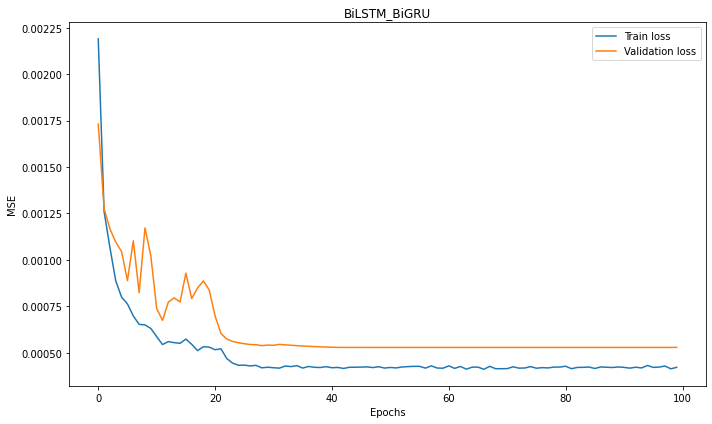

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 4s 11ms/step
RMSE at 40 = 8.534765
RMAE at 40 = 2.6803193
MAPE at 40 = 1.5983862
R2 at 40 = 0.6022838158827113
2/2 [==============================] - 0s 12ms/step
RMSE at 45 = 8.293251
RMAE at 45 = 2.628126
MAPE at 45 = 1.4270422
R2 at 45 = 0.8864589467019658
2/2 [==============================] - 0s 11ms/step
RMSE at 50 = 8.532918
RMAE at 50 = 2.681741
MAPE at 50 = 1.2950953
R2 at 50 = 0.9311278135630674
2/2 [==============================] - 0s 11ms/step
RMSE at 55 = 8.44592
RMAE at 55 = 2.6549935
MAPE at 55 = 1.1824366
R2 at 55 = 0.9443518514668965
2/2 [==============================] - 0s 12ms/step
RMSE at 60 = 8.98986
RMAE at 60 = 2.683279
MAPE at 60 = 1.0977149
R2 at 60 = 0.9428591264690376
3/3 [==============================] - 0s 7ms/step
RMSE at 65 = 11.913767
RMAE at 65 = 2.94677
MAPE at 65 = 1.0477716
R2 at 65 = 0.8945621995095885
3/3 [==============================] - 0s 7ms/step
RMSE at 70 = 14.3630085
RMAE at 70 = 3.1246018
MAPE at 7

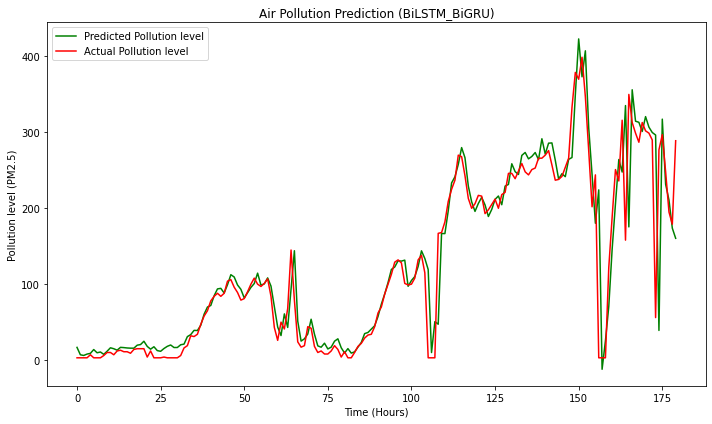

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [ ]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_BiLSTMBiGRU.csv', Y_test, delimiter=',')